In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for handling imbalancing
from imblearn.under_sampling import NearMiss
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# for learning rate decay
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r'C:\Users\riyad\Downloads\alphabet\A_Z Handwritten Data/A_Z Handwritten Data.csv')

In [8]:
# getting target variable
y = df['0']
del df['0']

In [9]:
x = y.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
x

0         A
1         A
2         A
3         A
4         A
         ..
372445    Z
372446    Z
372447    Z
372448    Z
372449    Z
Name: 0, Length: 372450, dtype: object

<AxesSubplot:xlabel='0', ylabel='count'>

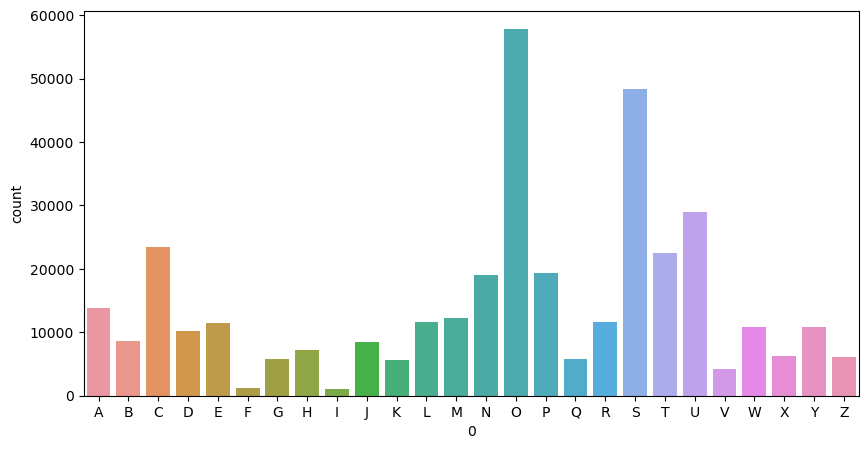

In [10]:
# Looking for imbalances in data
plt.figure(figsize = (10,5))
sns.countplot(x)

In [11]:
nM = NearMiss()
X_data, y_data = nM.fit_resample(df, y)

<AxesSubplot:xlabel='0', ylabel='count'>

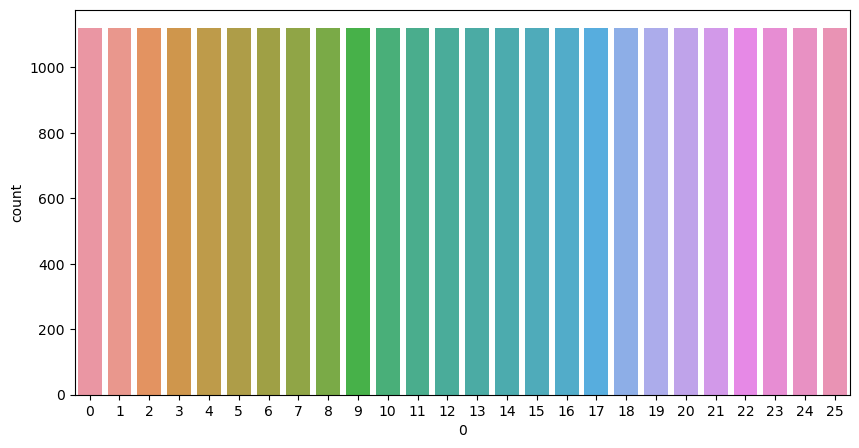

In [12]:
plt.figure(figsize = (10,5))
sns.countplot(y_data)

In [13]:
y = np_utils.to_categorical(y_data)
# Define the classification of 26 alphabets.
num_classes = y.shape[1]
num_classes

26

In [14]:
X_data = X_data / 255
X_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


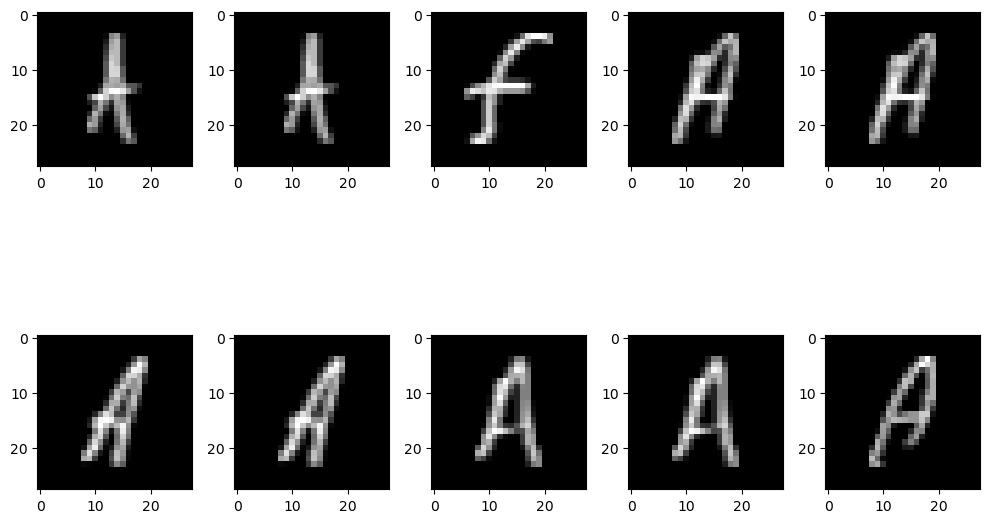

In [15]:
X_data = np.array(X_data)
X_data = X_data.reshape(-1,28,28,1)
# Showing few images

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2 ,random_state=102)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23296, 28, 28, 1), (5824, 28, 28, 1), (23296, 26), (5824, 26))

In [18]:
#Build an ordinary "Deep Learning" model with CNN and maxpooling by using Keras.
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#Choose an optimizer and compile the model.
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#And print the summary of the model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                                 
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
__________________________________________________

In [19]:
history = model.fit(X_train,y_train,epochs=15, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/15
182/182 [==============================] - 8s 39ms/step - loss: 0.4668 - accuracy: 0.8698 - val_loss: 0.1625 - val_accuracy: 0.9554
Epoch 2/15
182/182 [==============================] - 7s 37ms/step - loss: 0.1191 - accuracy: 0.9646 - val_loss: 0.1276 - val_accuracy: 0.9648
Epoch 3/15
182/182 [==============================] - 7s 37ms/step - loss: 0.0686 - accuracy: 0.9791 - val_loss: 0.1099 - val_accuracy: 0.9744
Epoch 4/15
182/182 [==============================] - 7s 37ms/step - loss: 0.0524 - accuracy: 0.9833 - val_loss: 0.1171 - val_accuracy: 0.9763
Epoch 5/15
182/182 [==============================] - 7s 36ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.1457 - val_accuracy: 0.9710
Epoch 6/15
182/182 [==============================] - 7s 37ms/step - loss: 0.0450 - accuracy: 0.9857 - val_loss: 0.1480 - val_accuracy: 0.9730
Epoch 7/15
182/182 [==============================] - 7s 36ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.1689 - val_accuracy: 0.9706

In [107]:
from tensorflow.keras.models import load_model
model.save('alphabet.h5')

In [ ]:
from tensorflow import keras
#model = keras.models.load_model('alphabet.h5')

In [21]:
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 3.02%


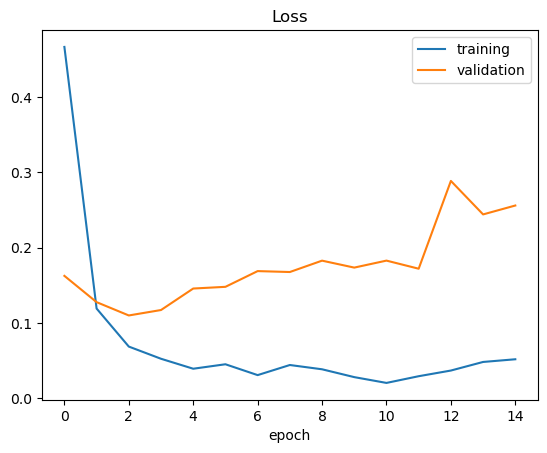

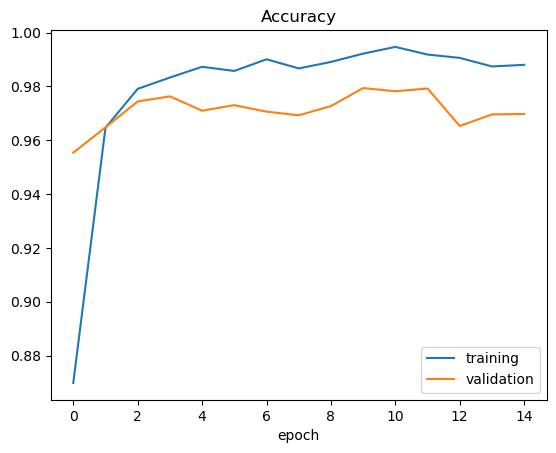

In [22]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [52]:
my_number = X_test[250]
type(my_number)

numpy.ndarray

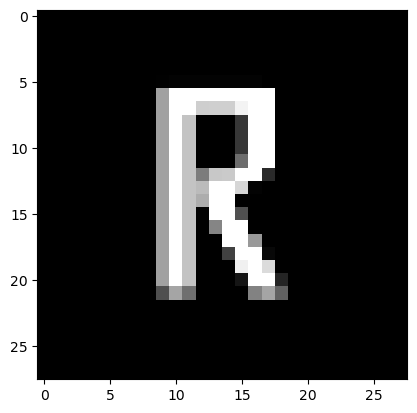

In [108]:
import cv2
from numpy import asarray
lol = cv2.imread(r'\data\letter2.png', cv2.IMREAD_GRAYSCALE)

imgr = cv2.resize(lol, (28,28), interpolation = cv2.INTER_LINEAR)
imgr = cv2.bitwise_not(imgr)

plt.imshow(imgr, cmap = 'gray')

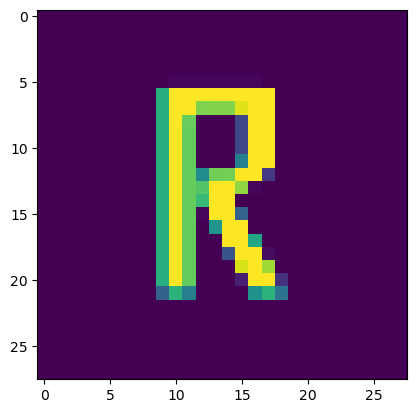

In [109]:
plt.imshow(imgr.reshape(28,28,1))

In [110]:
#lettre = np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)
lettre = np.argmax(model.predict(imgr.reshape(1,28,28,1)), axis=-1)


list = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
type(lettre[0])

print(list[lettre[0]])

1/1 [==============================] - 0s 29ms/step
R
